# <center> Week - 3 & 4 Exercises

<center> DSC-540

<center> Kalyan Pothineni


### 1. Genarating Statistics from a CSV File

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the Boston housing dataset from the CSV file
df = pd.read_csv('boston.csv')

In [3]:
# Display first 10 records
print(df.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  Price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  3

In [4]:
# Find the total number of records
print("Total number of records:", len(df))

Total number of records: 506


In [5]:
# Create a smaller dataframe with columns excluding CHAS, NOX, B, and LSTAT
small_df = df.drop(['CHAS', 'NOX', 'B', 'LSTAT'], axis=1)

In [6]:
# Check the last second records of the new dataframe
print(small_df.tail(7))

        CRIM   ZN  INDUS     RM   AGE     DIS  RAD  TAX  PTRATIO  Price
499  0.17783  0.0   9.69  5.569  73.5  2.3999    6  391     19.2   17.5
500  0.22438  0.0   9.69  6.027  79.7  2.4982    6  391     19.2   16.8
501  0.06263  0.0  11.93  6.593  69.1  2.4786    1  273     21.0   22.4
502  0.04527  0.0  11.93  6.120  76.7  2.2875    1  273     21.0   20.6
503  0.06076  0.0  11.93  6.976  91.0  2.1675    1  273     21.0   23.9
504  0.10959  0.0  11.93  6.794  89.3  2.3889    1  273     21.0   22.0
505  0.04741  0.0  11.93  6.030  80.8  2.5050    1  273     21.0   11.9


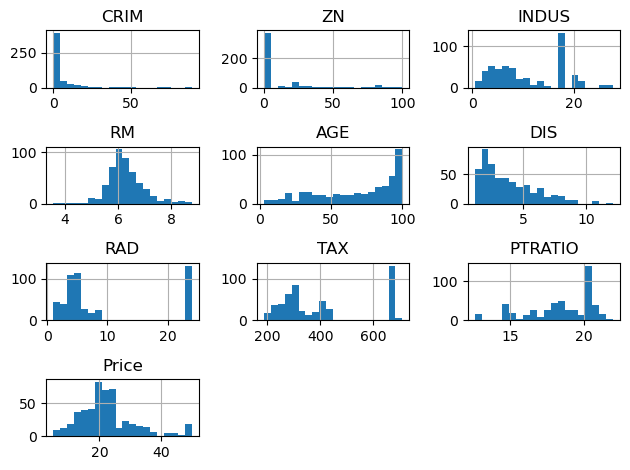

In [7]:
# Plot histograms of all variables in the new dataframe
# bins=20 provids a visual representation of the distribution of each variable in the DataFrame
small_df.hist(bins=20) # hist to plot histograms of the data
plt.tight_layout() 
plt.show()

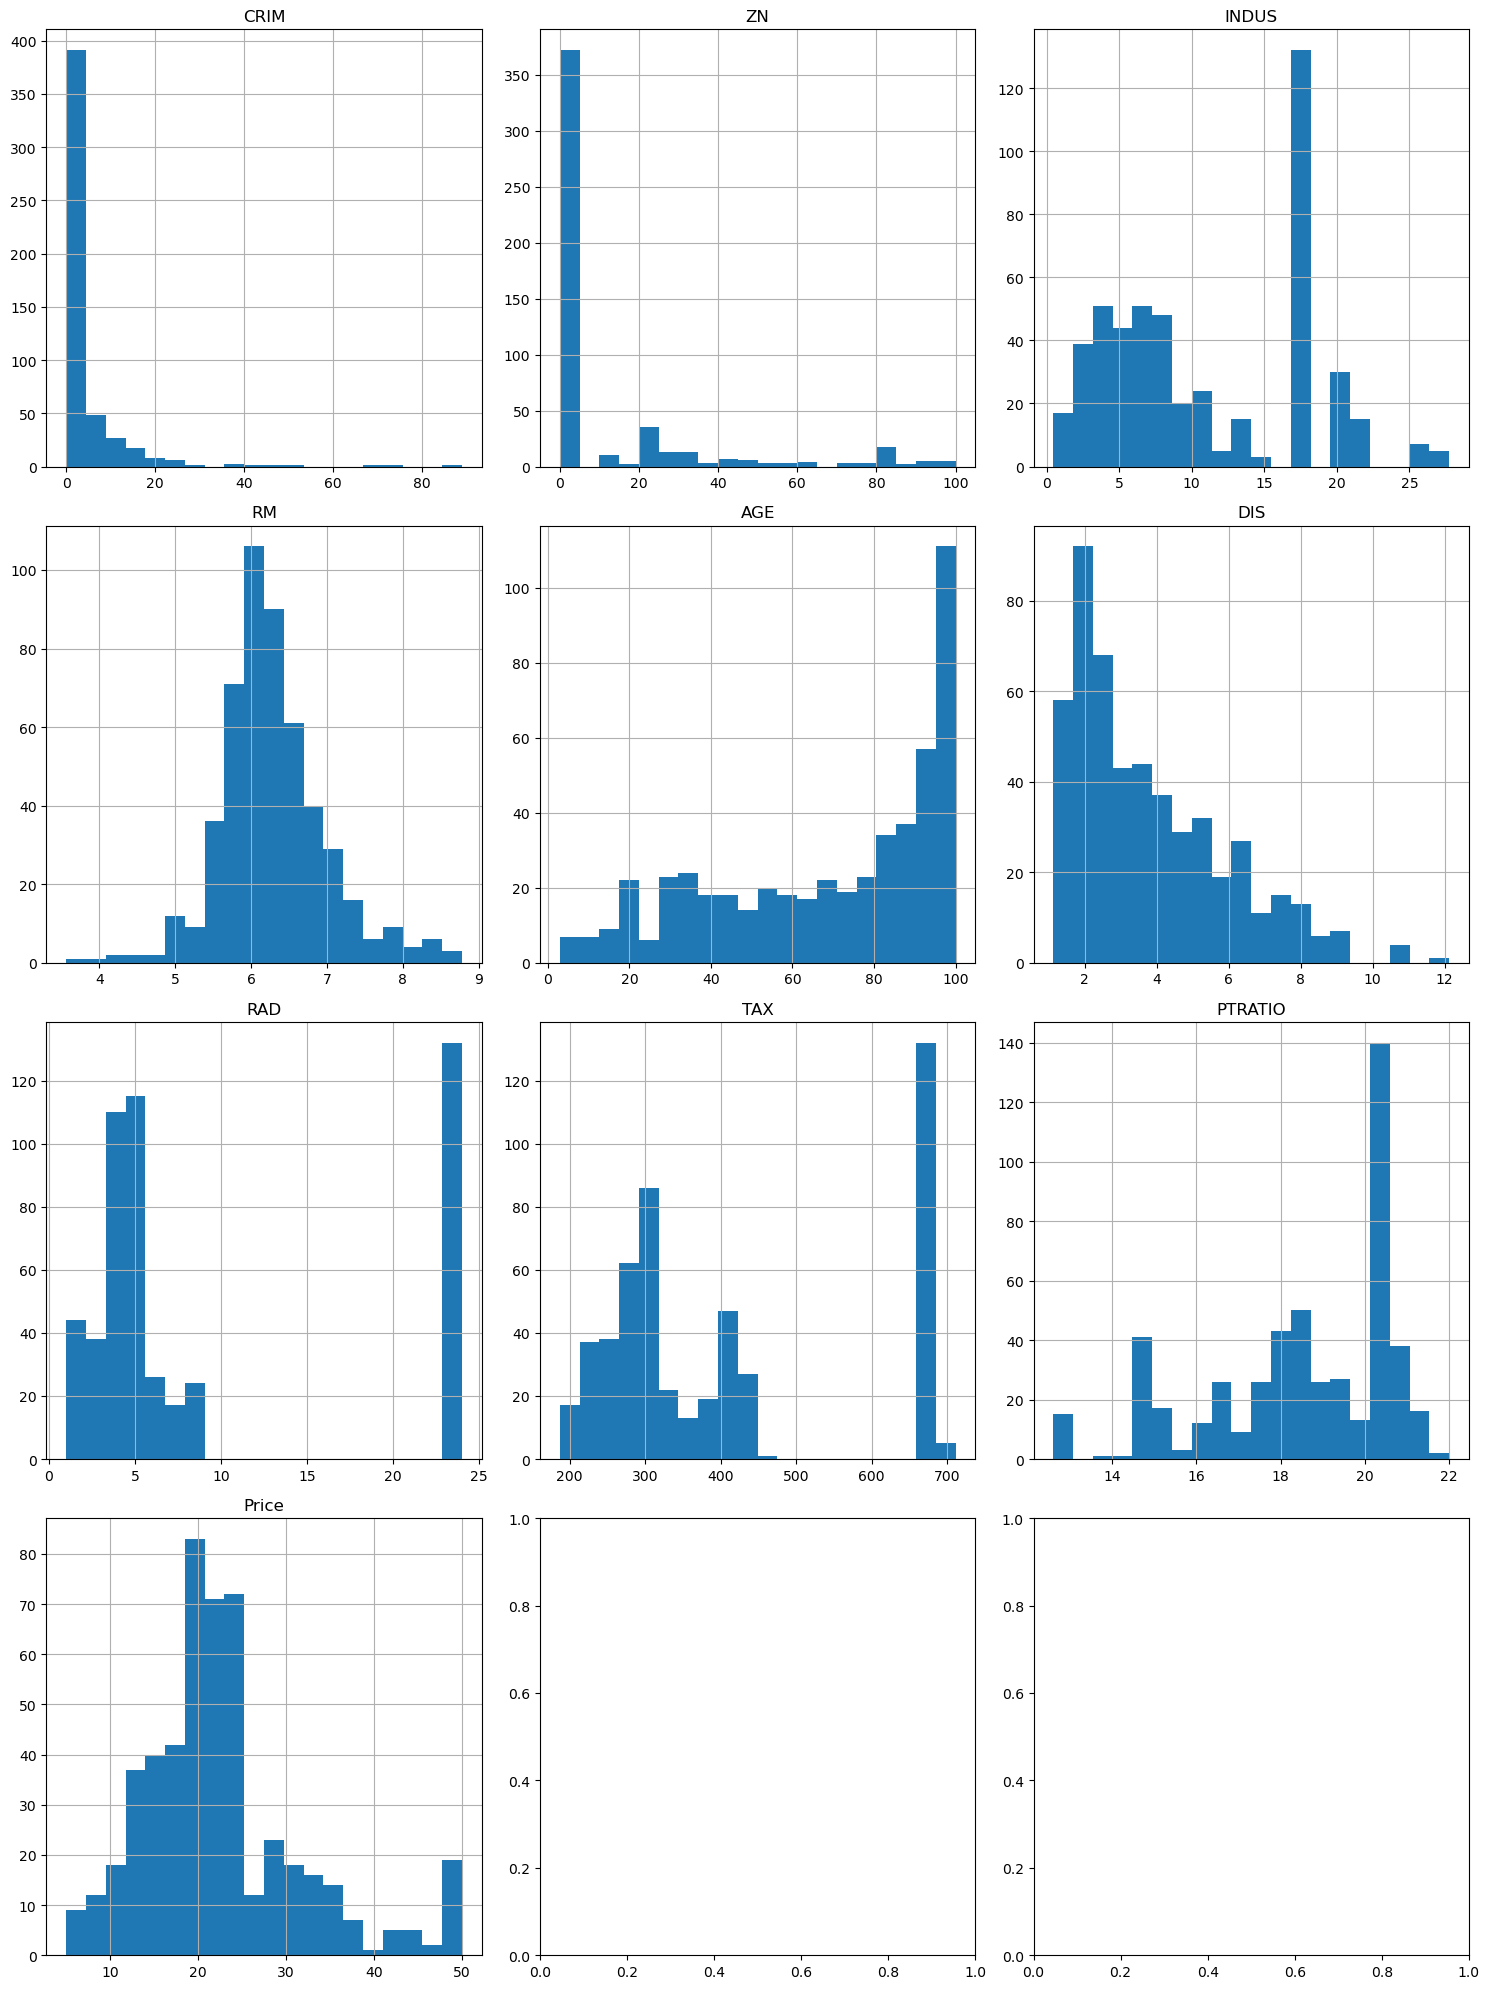

In [8]:
# Plot histograms using a for loop and add unique titles
columns = small_df.columns
num_columns = len(columns)

# Calculate the number of rows needed to accommodate the columns
num_rows = int(np.ceil(num_columns / 3))

# Create a grid of subplots, adjusting the number of rows and columns
fig, axs = plt.subplots(nrows=num_rows, ncols=min(num_columns, 3), figsize=(15, 20))

# Plot the histograms in the subplots
for i, column in enumerate(columns):
    # Calculate the subplot indices
    row_index = i // 3
    col_index = i % 3

    # Select the corresponding Axes object for the current subplot
    ax = axs[row_index, col_index]

    # Plot the histogram for the current column
    small_df[column].hist(ax=ax, bins=20)

    # Set the title for the subplot
    ax.set_title(column)

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

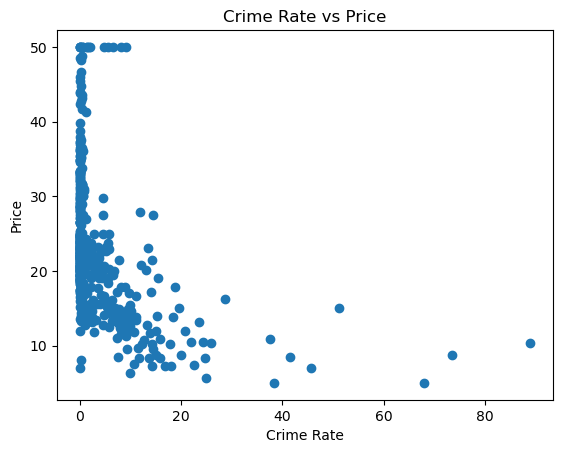

In [9]:
# Create a scatter plot of crime rate (CRIM) versus price
plt.scatter(df['CRIM'], df['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.title('Crime Rate vs Price')
plt.show()

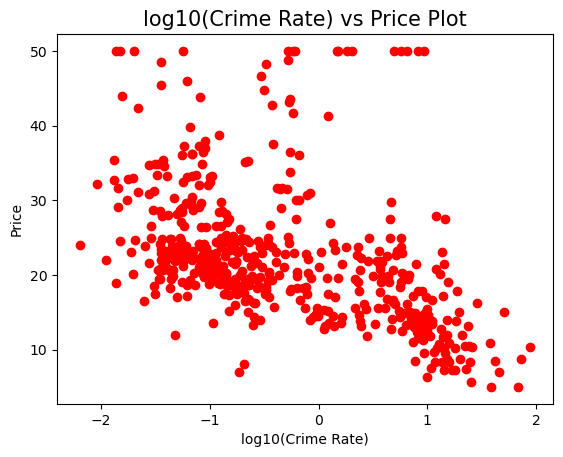

In [10]:
# Create a scatter plot using log10 of crime rate versus price, in red and title font size = 15
plt.scatter(np.log10(df['CRIM']), df['Price'],c='red')
plt.xlabel('log10(Crime Rate)')
plt.ylabel('Price')
plt.title('log10(Crime Rate) vs Price Plot', fontsize=15)
plt.show()

In [11]:
# Calculate useful statistics

# Calculate mean rooms
mean_rooms = df['RM'].mean()

# Calculate median age
median_age = df['AGE'].median()

# Calculate mean distances
mean_distances = df['DIS'].mean()

#Calculate low price percentage
low_price_percentage = (len(df[df['Price'] < 20]) / len(df)) * 100

In [12]:
# Print the above statistics
print("Mean Rooms per Dwelling:", mean_rooms)
print("Median Age:", median_age)
print("Mean Distances to Employment Centers:", mean_distances)
print("Percentage of Hours with Low Prices (< $20,000):", low_price_percentage)

Mean Rooms per Dwelling: 6.284634387351779
Median Age: 77.5
Mean Distances to Employment Centers: 3.795042687747036
Percentage of Hours with Low Prices (< $20,000): 41.50197628458498


### 2. Working with the Adult Incode Dataset

In [13]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [14]:
# Read the adult dataset from the URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adult_df = pd.read_csv(url, names=columns)

In [15]:
# Display first 5 records to check for if the data is loaded into DataFrame
adult_df.head()

,,,,,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,Price
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
# Script to read adult_income_names text file line by line and print the names of the columns
def read_header(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        columns = []
        for line in lines:
            if line.strip().endswith('.'):
                column_name = line.split(':')[0].strip()
                columns.append(column_name)
        return columns

file_path = 'adult_income_names.txt'
names = read_header(file_path)
column_array = names.copy()
print(column_array)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [17]:
# Append a new column name to the list
names.append('income')

print(names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [18]:
# Read the data from CSV file in to DataFrame 
adult_df = pd.read_csv("adult_income_data.csv", names=names)
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [19]:
# Get the statistical summary of the DataFrame
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
# Find the missing values in the adult_df DataFrame and print them
missing_values = adult_df.isnull().sum()
print(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [21]:
# Create a DataFrame with only age, education, and occupation by using subsetting
subset_adult_df = adult_df[['age', 'education', 'occupation']]
subset_adult_df.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


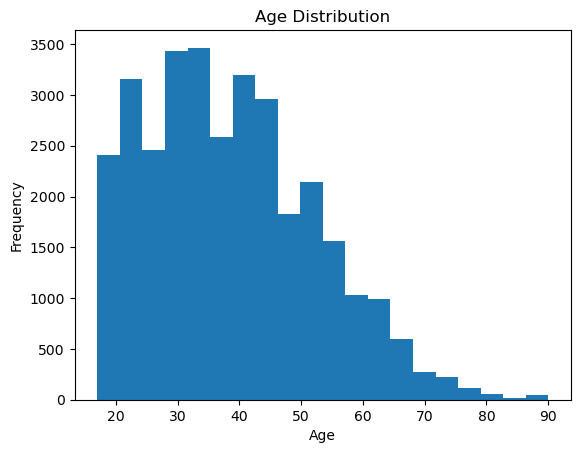

In [22]:
# Plot a histogram of age with a bin size of 20
plt.hist(subset_adult_df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

<Figure size 2500x1000 with 0 Axes>

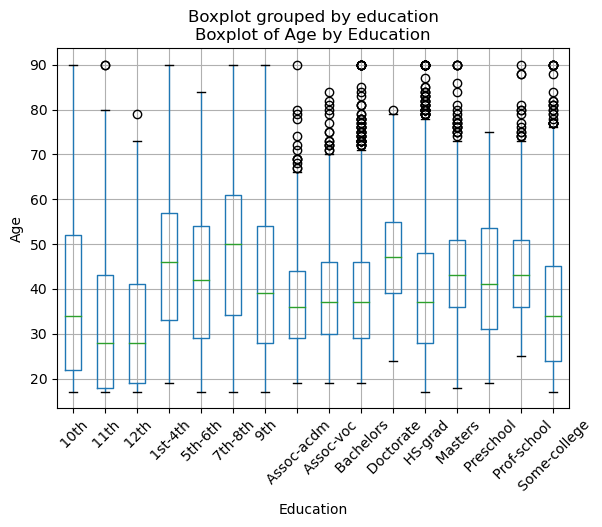

In [23]:
# Boxplot for age grouped by education
plt.figure(figsize=(25, 10))
subset_adult_df.boxplot(column='age', by='education')
plt.xlabel('Education')
plt.ylabel('Age')
plt.title('Boxplot of Age by Education')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Create a function to strip whitespace characters
def strip_whitespace(text):
    return text.strip()

In [27]:
# Create a new column, copy values, and drop the new column for 'education'
new_column_edu = 'education_stripped'
subset_adult_df[new_column_edu] = subset_adult_df['education'].apply(strip_whitespace)
subset_adult_df['education'] = subset_adult_df[new_column_edu]
subset_adult_df = subset_adult_df.drop(columns=[new_column_edu])

# Create a new column, copy values, and drop the new column for 'occupation'
new_column_occ = 'occupation_stripped'
subset_adult_df[new_column_occ] = subset_adult_df['occupation'].apply(strip_whitespace)
subset_adult_df['occupation'] = subset_adult_df[new_column_occ]
subset_adult_df = subset_adult_df.drop(columns=[new_column_occ])

# Ignore warnings
warnings.filterwarnings("ignore")

In [28]:
# Find the number of people who are aged between 30 and 50
people_between_30_and_50 = subset_adult_df[(subset_adult_df['age'] >= 30) & (subset_adult_df['age'] <= 50)]

# Check the new Dataframe
people_between_30_and_50.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service


In [29]:
# Records based on age and education to find how the mean age is distributed
age_education_mean = subset_adult_df.groupby('education')['age'].mean()
print("Mean of Age and Education:",age_education_mean)

Mean of Age and Education: education
10th            37.429796
11th            32.355745
12th            32.000000
1st-4th         46.142857
5th-6th         42.885886
7th-8th         48.445820
9th             41.060311
Assoc-acdm      37.381443
Assoc-voc       38.553546
Bachelors       38.904949
Doctorate       47.702179
HS-grad         38.974479
Masters         44.049913
Preschool       42.764706
Prof-school     44.746528
Some-college    35.756275
Name: age, dtype: float64


In [30]:
# Group by occupation and show the summary statistics of age,
# Find which profession has the oldest workers on average 
# and which profession has its largest share of the workforce above the 75th percentile

# Exclude rows with "?" occupation
subset_adult_df_cleaned = subset_adult_df[subset_adult_df['occupation'] != '?']

# Group by occupation and show the summary statistics of age
occupation_stats = subset_adult_df_cleaned.groupby('occupation')['age'].describe()

# Find which profession has the oldest workers on average
oldest_occupation = occupation_stats[occupation_stats['mean'] == occupation_stats['mean'].max()].index[0]

# Find which profession has its largest share of the workforce above the 75th percentile
high_percentile_occupation = occupation_stats[occupation_stats['75%'] == occupation_stats['75%'].max()].index[0]

# Print the occupation statistics
print(occupation_stats)

# Check if the oldest_occupation variable is empty
if len(oldest_occupation) > 0:
    print("Profession with the oldest workers on average:", oldest_occupation)
else:
    print("No records found for the oldest workers.")

# Check if the high_percentile_occupation variable is empty
if len(high_percentile_occupation) > 0:
    print("Profession with the largest share of the workforce above the 75th percentile:", high_percentile_occupation)
else:
    print("No records found for the workforce above the 75th percentile.")



                    count       mean        std   min   25%   50%   75%   max
occupation                                                                   
Adm-clerical       3770.0  36.964456  13.362998  17.0  26.0  35.0  46.0  90.0
Armed-Forces          9.0  30.222222   8.089774  23.0  24.0  29.0  34.0  46.0
Craft-repair       4099.0  39.031471  11.606436  17.0  30.0  38.0  47.0  90.0
Exec-managerial    4066.0  42.169208  11.974548  17.0  33.0  41.0  50.0  90.0
Farming-fishing     994.0  41.211268  15.070283  17.0  29.0  39.0  52.0  90.0
Handlers-cleaners  1370.0  32.165693  12.372635  17.0  23.0  29.0  39.0  90.0
Machine-op-inspct  2002.0  37.715285  12.068266  17.0  28.0  36.0  46.0  90.0
Other-service      3295.0  34.949621  14.521508  17.0  22.0  32.0  45.0  90.0
Priv-house-serv     149.0  41.724832  18.633688  17.0  24.0  40.0  57.0  81.0
Prof-specialty     4140.0  40.517633  12.016676  17.0  31.0  40.0  48.0  90.0
Protective-serv     649.0  38.953775  12.822062  17.0  29.0  36.

In [31]:
# Use subset and groupby to find outliers

# Identify outliers in the 'age' column within each occupation group separately
# Calculates the upper and lower boundaries for outliers based on the mean 
# and standard deviation of each occupation group's 'age' values

outliers_stats = subset_adult_df.groupby('occupation').describe()['age']
outliers_stats


,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


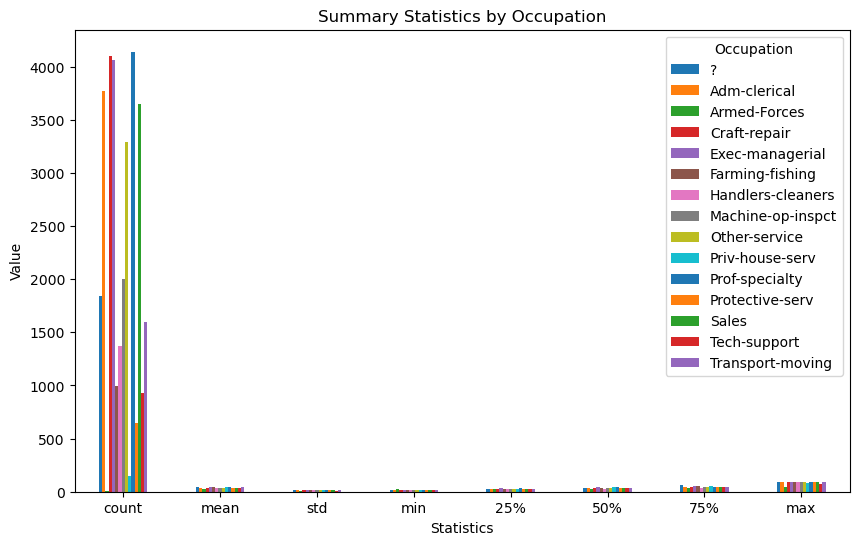

In [32]:
# Transpose the outliers_stats DataFrame for easier plotting
outliers_stats_transposed = outliers_stats.T

# Plot the bar chart
outliers_stats_transposed.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.title('Summary Statistics by Occupation')
plt.legend(title='Occupation', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()


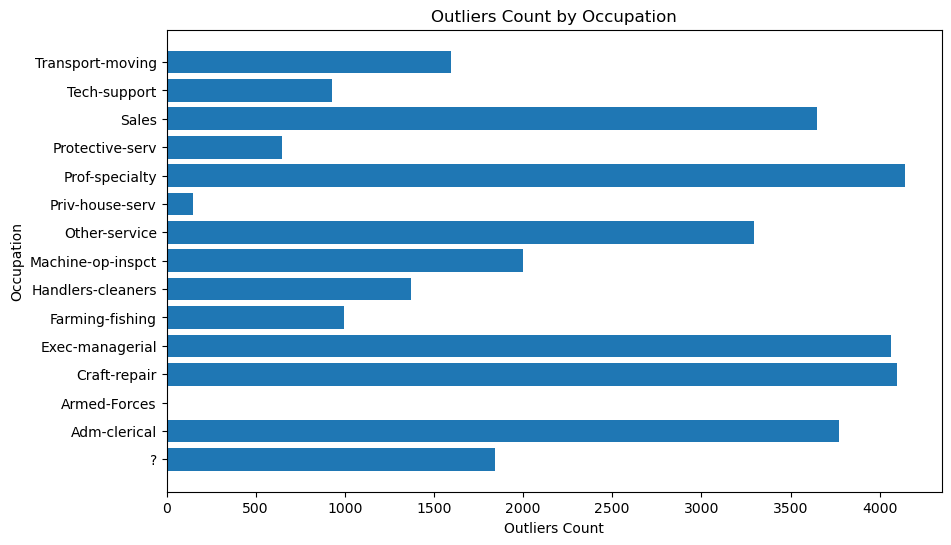

In [33]:
# Plot the bar chart
# visualizes the outliers count for each occupation 
# and the corresponding outliers count 
plt.figure(figsize=(10, 6))
plt.barh(y=outliers_stats.index, 
        width=outliers_stats['count'])
plt.xlabel('Outliers Count')
plt.ylabel('Occupation')
plt.title('Outliers Count by Occupation')
plt.yticks(fontsize=10)
plt.show()

In [34]:
# Merge subset of adult Datframe and outlier stats on occupation
merged_df = pd.merge(subset_adult_df, outliers_stats, on='occupation')
distinct_values = merged_df.drop_duplicates()
distinct_values.head()

,age,education,occupation,count,mean,std,min,25%,50%,75%,max
0,39,Bachelors,Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
1,23,Bachelors,Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
2,30,Some-college,Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
3,19,HS-grad,Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
4,49,HS-grad,Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0


### 3. Create a series and practice basic arithmetic steps

In [35]:
# create Series 1
series1 = [7.3, -2.5, 3.4, 1.5]
index1 = ['a', 'c', 'd', 'e']

In [36]:
# Create Series 2
series2 = [-2.1, 3.6, -1.5, 4, 3.1]
index2 = ['a', 'c', 'e', 'f', 'g']

In [37]:
# Add Series 1 and Series 2 together
result_addition = [x + y for x, y in zip(series1, series2)]

In [38]:
# Subtract Series 1 from Series 2
result_subtraction = [x - y for x, y in zip(series2, series1)]

In [39]:
# Print the results
print("Addition Results:", result_addition)
print("Subtraction Results:", result_subtraction)

Addition Results: [5.199999999999999, 1.1, 1.9, 5.5]
Subtraction Results: [-9.4, 6.1, -4.9, 2.5]


#### Print in deatils of addition and subtraction

In [40]:
# Print the results
print("Addition Result:")
for i in range(len(result_addition)):
    print(f"{index1[i]} + {index2[i]} = {result_addition[i]}")

print("\nSubtraction Result:")
for i in range(len(result_subtraction)):
    print(f"{index2[i]} - {index1[i]} = {result_subtraction[i]}")

Addition Result:
a + a = 5.199999999999999
c + c = 1.1
d + e = 1.9
e + f = 5.5

Subtraction Result:
a - a = -9.4
c - c = 6.1
e - d = -4.9
f - e = 2.5


### 4. Read Tabular Data from wikipedia Web Page and create DataFrames

In [13]:
# Import libraries as needed
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re

In [14]:
# Specify the URL of the webpage to scrape
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

# Send a GET request to the URL and get the HTML content
response = requests.get(url)
html_content = response.text

In [15]:
# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

In [16]:
# Find all tables on the webpage
table = soup.find_all("table")
print("Total number of tables are {}".format(len(table)))

Total number of tables are 7


In [17]:
# Find the specific table with class "wikitable"
data_table = soup.find("table", {"class": "wikitable"})
print(type(data_table))

<class 'bs4.element.Tag'>


In [18]:
# Find all header cells with attribute colspan
colspan_cells = data_table.find_all("th", attrs={"colspan": True})

# Extract the source names from the cells with colspan
source_names = []
for cell in colspan_cells:
    link = cell.find("a")
    if link:
        source_name = link.text.strip()
        source_names.append(source_name)

print(source_names)

['IMF', 'World Bank', 'United Nations']


In [20]:
# Exclude header rows
data_rows = data_table.find_all("tr")[3:]

In [21]:
# Define a regex pattern to remove unwanted characters from data
pattern = re.compile(r"\s*\[.*?\]")

In [22]:
# Extract the first source name
first_source_name = soup.find("th", {"colspan": "2"}).find("a").text.strip()

# Extract data for the first source
source_data = []
for row in data_rows:
    columns = row.find_all("td")
    if len(columns) > 1:
        country = columns[0].text.strip()
        estimate = re.sub(pattern, "", columns[2].text.strip()) # Extract numeric values only
        year = re.sub(r"\D", "", columns[3].text.strip())  # Extract numeric values only
        source_data.append([country, estimate, year])

# Create a dataframe from the extracted data for the first source
df = pd.DataFrame(source_data, columns=["Country/Territory", "Estimate", "Year"])

print("First Source Name:", first_source_name)
print(df)

First Source Name: IMF
    Country/Territory    Estimate   Year
0       United States  26,854,599   2023
1               China  19,373,586  12023
2               Japan   4,409,738   2023
3             Germany   4,308,854   2023
4               India   3,736,882   2023
..                ...         ...    ...
208          Anguilla           —       
209          Kiribati         248   2023
210             Nauru         151   2023
211        Montserrat           —       
212            Tuvalu          65   2023

[213 rows x 3 columns]


In [24]:
# Extract the second source name
second_source_name = soup.find("th", {"colspan": "2"}).find_next_sibling("th").find("a").text.strip()

# Extract data for the second source
second_source_data = []
for row in data_rows:
    columns = row.find_all("td")
    if len(columns) > 1:
        country = columns[0].text.strip()
        estimate = re.sub(pattern, "", columns[4].text.strip()) # Extract numeric values only
        year = re.sub(r"\D", "", columns[5].text.strip())  # Extract numeric values only
        second_source_data.append([country, estimate, year])

# Create a dataframe from the extracted data for the second source
second_df = pd.DataFrame(second_source_data, columns=["Country/Territory", "Estimate", "Year"])

print("Second Source Name:", second_source_name)
print(second_df)

Second Source Name: World Bank
    Country/Territory    Estimate   Year
0       United States  25,462,700   2022
1               China  17,963,171  32022
2               Japan   4,231,141   2022
3             Germany   4,072,192   2022
4               India   3,385,090   2022
..                ...         ...    ...
208          Anguilla         303   2021
209          Kiribati         223   2022
210             Nauru         151   2022
211        Montserrat          72   2021
212            Tuvalu          60   2022

[213 rows x 3 columns]


In [45]:
# Extract data for the third source
third_source_name = soup.find('th', colspan='2').find_next_sibling('th').find_next_sibling('th').find('a').text.strip()

# Extract data for the second source
third_source_data = []
for row in data_rows:
    columns = row.find_all('td')
    if len(columns) >= 1:
        country = columns[0].text.strip()
        estimate_3 = re.sub(r'[^0-9,]', '', columns[-1].text.strip())  # Extract numeric values only
        year_3 = re.sub(r'[^0-9]', '', columns[-2].text.strip())  # Extract numeric values only
        third_source_data.append([country, estimate, year])

# Create dataframe for the third source
third_df = pd.DataFrame(third_source_data, columns=['Country/Territory', 'Estimate', 'Year'])

print('Third Source Name:', third_source_name)
print(third_df)

Third Source Name: United Nations
    Country/Territory Estimate  Year
0               World  812,867  2021
1       United States  812,867  2021
2               China  812,867  2021
3               Japan  812,867  2021
4             Germany  812,867  2021
..                ...      ...   ...
209          Anguilla  812,867  2021
210          Kiribati  812,867  2021
211             Nauru  812,867  2021
212        Montserrat  812,867  2021
213            Tuvalu  812,867  2021

[214 rows x 3 columns]


### 5. Handling Outliers and Missing data in visit_date.csv file

In [45]:
# Import libraries as needed
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# Read the visit_data.csv file and load into Dataframe
visit_df = pd.read_csv('visit_data.csv')
visit_df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [47]:
# Get the size of the dataframe before removing outliers
size_prev = visit_df.shape  
size_prev

(1000, 7)

In [48]:
# Checking at column level to see if we have any duplicates
print("Is First name duplicated - {}".format(any(visit_df.first_name.duplicated())))
print("Is Last duplicated - {}".format(any(visit_df.last_name.duplicated())))
print("Is Email duplicated - {}".format(any(visit_df.email.duplicated())))
print("Is ip address duplicated - {}".format(any(visit_df.ip_address.duplicated())))

Is First name duplicated - True
Is Last duplicated - True
Is Email duplicated - False
Is ip address duplicated - False


In [49]:
# Check if any column contains NaN
missing_values = visit_df.isnull().any()
if missing_values.any():
    print("The following columns contain missing values:")
    print(missing_values)

The following columns contain missing values:
id            False
first_name     True
last_name      True
email         False
gender         True
ip_address    False
visit          True
dtype: bool


In [50]:
# Remove rows with NaN values in the 'visit' column
visit_df = visit_df.dropna(subset=['visit'])  

# Get the size of the dataframe after removing NaN values
size_after = visit_df.shape  

# Print the number of rows removed
num_rows_removed = size_prev[0] - size_after[0]
print("Number of rows deleted with Nan values in visit:", num_rows_removed)  

Number of rows deleted with Nan values in visit: 26


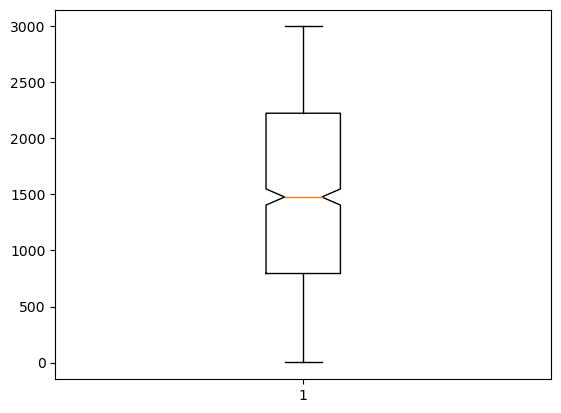

In [53]:
plt.boxplot(visit_df.visit, notch=True)
plt.show()

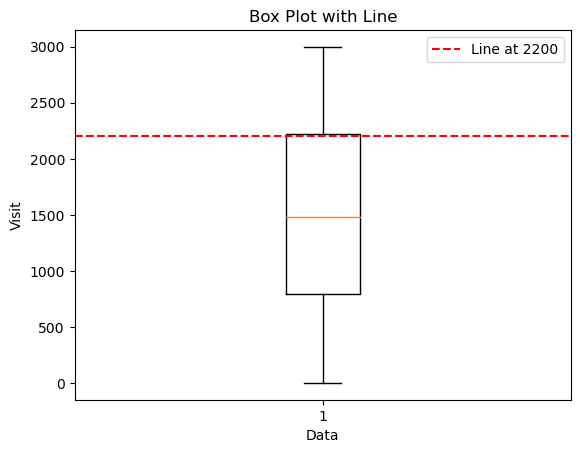

In [54]:
import matplotlib.pyplot as plt

# Create the box plot
plt.boxplot(visit_df['visit'])

# Add a horizontal line at a specific value
line_value = 2200
plt.axhline(line_value, color='red', linestyle='--', label='Line at 2200')

# Customize the plot
plt.title("Box Plot with Line")
plt.ylabel("Visit")
plt.xlabel("Data")
plt.legend()

# Show the plot
plt.show()

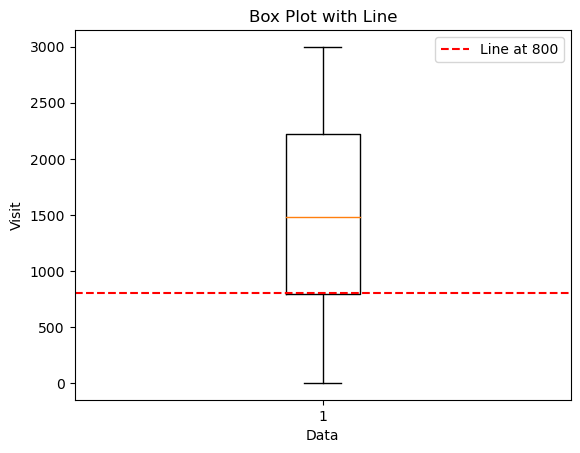

In [55]:
import matplotlib.pyplot as plt

# Create the box plot
plt.boxplot(visit_df['visit'])

# Add a horizontal line at a specific value
line_value = 800
plt.axhline(line_value, color='red', linestyle='--', label='Line at 800')

# Customize the plot
plt.title("Box Plot with Line")
plt.ylabel("Visit")
plt.xlabel("Data")
plt.legend()

# Show the plot
plt.show()


#### The dataset ranges from 0 to 3000. Analyzing the box plot reveals that the majority of the data is concentrated between 800 and 2200. To identify outliers, we can define values beyond 2500 and below 500. Removing these outliers from the dataset is a suitable course of action.

In [56]:
# Create new DataFrame between visit range of 500 and 2500
new_visit_df = visit_df.query('500 <= visit <= 2500')

#Print the size of new DataFrame
new_size = new_visit_df.shape  
print("New size of the data:", new_size) 

New size of the data: (686, 7)


### 6. Insert data into a SQL lite DB - Create a table

In [1]:
# Import libraries as needed
import os
import sqlite3

In [2]:
# Check if the database file exists
if os.path.exists('datawrangling.db'):
    print('Database already exists')
else:
    # If it doesn't exist, create a new database
    conn = sqlite3.connect('datawrangling.db')
    print('Database created')
    conn.close()

print('Database check complete')


Database already exists
Database check complete


In [3]:
# Connect to the database
conn = sqlite3.connect('datawrangling.db')

In [4]:
# Create a cursor object to interact with the database
cursor = conn.cursor()

In [5]:
# Create a table
cursor.execute('''CREATE TABLE IF NOT EXISTS personal_info
                  (name TEXT, address TEXT, city TEXT, state TEXT, zip TEXT, phone TEXT)''')


In [6]:
# Sample data
data = [
    ('John Doe', '123 Main St', 'Anytown', 'CA', '12345', '555-1234'),
    ('Jane Smith', '456 Elm St', 'Sometown', 'NY', '54321', '555-5678'),
    ('Mike Johnson', '789 Oak Ave', 'Othertown', 'TX', '67890', '555-9876'),
    ('Laura Wilson', 'V3XgKwgncV', 'Dallas', 'IL', '80871', '250721'),
    ('Laura Wilson', 'FxDymSMA60', 'Philadelphia', 'NY', '04532', '3257452415'),
    ('Daniel Miller', 'aBBUFjMZjI', 'Chicago', 'CA', '92669', '7791389456'),
    ('John Doors', 'KYVF26zdX7', 'San Antonio', 'AZ', '09865', '2313317002'),
    ('Mike Johnsun', 'kI4BjMdSro', 'Philadelphia', 'CA', '74091', '9343009155'),
    ('Emily Brown', 'xG5EAnlLZG', 'Phoenix', 'CA', '35614', '2115914564'),
    ('Sarah Anderson', '5aoSWuGHgu', 'Houston', 'AZ', '01335', '1012392277'),
    ('Emily Brown', 'q0raJviBkO', 'Los Angeles', 'CA', '28001', '7616913946'),
    ('Sarah Anderson', '0Z1CxHKzLB', 'Houston', 'CA', '60937', '7140814165'),
    ('Emma Taylor', 'V0wjVDAGy0', 'New York', 'AZ', '54020', '6976164150')
]


In [7]:
# Insert the data into the table
cursor.executemany('INSERT INTO personal_info VALUES (?, ?, ?, ?, ?, ?)', data)

In [8]:
# Commit the changes to the database
conn.commit()

In [9]:
# Query the table
cursor.execute('SELECT * FROM personal_info')
rows = cursor.fetchall()

In [10]:
# Print the query results
for row in rows:
    print(row)

('John Doe', '123 Main St', 'Anytown', 'CA', '12345', '555-1234')
('Jane Smith', '456 Elm St', 'Sometown', 'NY', '54321', '555-5678')
('Mike Johnson', '789 Oak Ave', 'Othertown', 'TX', '67890', '555-9876')
('Laura Wilson', 'V3XgKwgncV', 'Dallas', 'IL', '80871', '250721')
('Laura Wilson', 'FxDymSMA60', 'Philadelphia', 'NY', '04532', '3257452415')
('Daniel Miller', 'aBBUFjMZjI', 'Chicago', 'CA', '92669', '7791389456')
('John Doors', 'KYVF26zdX7', 'San Antonio', 'AZ', '09865', '2313317002')
('Mike Johnsun', 'kI4BjMdSro', 'Philadelphia', 'CA', '74091', '9343009155')
('Emily Brown', 'xG5EAnlLZG', 'Phoenix', 'CA', '35614', '2115914564')
('Sarah Anderson', '5aoSWuGHgu', 'Houston', 'AZ', '01335', '1012392277')
('Emily Brown', 'q0raJviBkO', 'Los Angeles', 'CA', '28001', '7616913946')
('Sarah Anderson', '0Z1CxHKzLB', 'Houston', 'CA', '60937', '7140814165')
('Emma Taylor', 'V0wjVDAGy0', 'New York', 'AZ', '54020', '6976164150')
('John Doe', '123 Main St', 'Anytown', 'CA', '12345', '555-1234')
('Ja

In [11]:
# Close the cursor and the connection
cursor.close()
conn.close()